# $$Árvore~de~Decisão: Entropia$$

### $$Conceito:$$


**Árvores de decisão (ou árvores de classificação)** são modelos de aprendizado supervisionado que representam regras de decisão baseadas nos valores dos atributos.


**Os atributos no topo da árvore** são os mais importantes para descrever o comportamento da variável Target, seguindo uma ordem de importância


Para construir uma **árvore de decisão usamos 2 formulas importantes: Entropia e Índice de Gini**, com elas você consegue descobrir quais variáveis são mais importantes para explicar a variável Target



**A construção de uma árvore de decisão tem três objetivos, quais sejam:**

- Diminuir a entropia (a aleatoriedade da variável objetivo)

- Ser consistente com o conjunto de dados (Treino e teste)

- Possuir o menor número de nós

### $$Terminologias~ relacionadas~ às ~árvores~ de~ decisão:$$


**Pruning:** 
- Eliminar alguns Nós da Árvore para evitar Overfitting


**Regra de Parada:**
- Os parâmetros usados para regra de parada são: Índice Gini, Qui-Quadrado, Ganho de Informação e Redução de Variância



**Tipo de Distribuição:**
- **Método não paramétrico:**  A  árvore  de  decisão  é  considerada  um  método  não-paramétrico. Isto significa que as árvores de decisão não pressupõem distribuição do espaço nem a estrutura do classificador


**Nó pai e nó filho:**

- Um nó que é dividido em sub-nós é chamado de nó pai (nó raiz). Os sub-nós são os nós filhos (nós subsequentes) do nó pai




### $$Entropia (Desordem):$$



Através da **entropia** é possível verificar a variação das classes dos dados na variável target. **Quanto maior a entropia, maior a desordem dos dados (dados balanceados), o intervalo de Entropia varia entre 0 e 1 para dados binários e maior que 1 em multiclasses**


Quanto mais **equilibrado os dados** estiverem na variável Target mais **distante do valor 0** a entropia vai estar


Para **diminuir a entropia** nos dados da **variável target**, temos que **adicionar variáveis explicativas** e **calcular seu ganho de informação**, a variável que tiver o maior valor do ganho de informação será o nó raiz e ficará no topo da árvore, seguindo a ordem até o nó folha que deixará os dados mais puro possível (Entropia 0 ou próxima de 0)



### $$Índice ~ Gini:$$

O **Objetivo do índice gini é selecionar as variáveis mais relevantes** para prever as features do modelo utilizando o algoritmo de árvore de decisão


Assim como na Entropia, será verificada a distribuição dos dados nas variáveis preditoras de acordo com a variação da variável target, A variável preditora com o **menor índice Gini** será a escolhida para o **nó principal** da árvore, o intervalo de Impureza Gini varia entre 0 e 0,5.


A **Impureza Gini** é calculada para **cada classe da variável explicativa**, quanto **menor** for o **valor, menor será o valor do índice gini**
 

**Obs:** Podem haver variáveis que tem o valor de gini alto, podendo ficar de fora da árvore




### $$Representando ~Árvores~ de~ Decisão:$$

- Cada nó interno (variável explicativa) testa um atributo (classe da variável explicativa)


- Cada ramo corresponde a um valor do atributo (classe da variável explicativa)


- Cada folha representa uma classe (variável Target)


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

## $$Objetivo:$$  

## $$Classificar~corretamente~as~classes~da~variável~target$$$$usando~o~algoritimo~de~Árvore~de~decisão~com~a~entropia$$

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

In [1]:
#Pacotes
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

# Banco de dados 

In [2]:
# Carregando o dataset
dados = pd.read_csv('decisao.csv',encoding='latin1',sep=';')
dados

,Historico_Credito,Divida,Garantias,Renda_Anual,Risco
0,Ruim,Alta,Nenhuma,<15.000,Alto
1,Desconhecida,Alta,Nenhuma,>=15.000 a <=35.000,Alto
2,Desconhecida,Baixa,Nenhuma,>=15.000 a <=35.000,Moderado
3,Desconhecida,Baixa,Nenhuma,>35.000,Alto
4,Desconhecida,Baixa,Nenhuma,>35.000,Baixo
5,Desconhecida,Baixa,Adequada,>35.000,Baixo
6,Ruim,Baixa,Nenhuma,<15.000,Alto
7,Ruim,Baixa,Adequada,>35.000,Moderado
8,Boa,Baixa,Nenhuma,>35.000,Baixo
9,Boa,Alta,Adequada,>35.000,Baixo


**São 14 observações e 5 variáveis**

# Análise Exploratória

In [3]:
#Tipos de variáveis
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Historico_Credito  14 non-null     object
 1   Divida             14 non-null     object
 2   Garantias          14 non-null     object
 3   Renda_Anual        14 non-null     object
 4   Risco              14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


**Variáveis qualitativas, sem valores nulos**

# Calcular a entropia da varáriavel target

**A Primeira etapa é verificar o nível de desordem da variável target, quanto mais equilíbrio na classe mais desordem haverá nos dados, consequentemente maior o valor da entropia**

In [4]:
# Calcular a Entropia da Varariavel Y


#Probabilidades de cada classe da variável Target
prob_Risco_alto = len(dados.loc[(dados['Risco'] =='Alto')])/len(dados)
prob_Risco_mod = len(dados.loc[(dados['Risco'] =='Moderado')])/len(dados)
prob_Risco_baixo = len(dados.loc[(dados['Risco'] =='Baixo')])/len(dados)

#Formula da Entropia na variável target
entropia_pai = ((-prob_Risco_alto*np.log2(prob_Risco_alto)-(prob_Risco_mod*np.log2(prob_Risco_mod))-
                 (prob_Risco_baixo*np.log2(prob_Risco_baixo))))


print(f'Probabilidade de Risco Alto  = {round(prob_Risco_alto,2)}')
print(f'Probabilidade de Risco Moderado = {round(prob_Risco_mod,2)}')
print(f'Probabilidade de Risco Baixo = {round(prob_Risco_baixo,2)}\n')
print(f'Valor da entropia da variavel Target = {round(entropia_pai,2)}')


Probabilidade de Risco Alto  = 0.43
Probabilidade de Risco Moderado = 0.21
Probabilidade de Risco Baixo = 0.36

Valor da entropia da variavel Target = 1.53


**Observe que a probabilidade das classes são equilibradas, portanto o valor da entropia é alta**

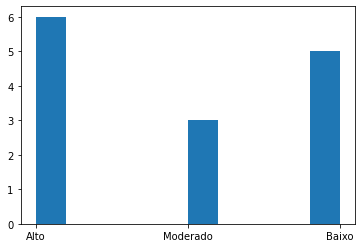

In [5]:
#Histograma
plt.hist(dados.Risco);

# Ganho de Informação:

## 1° Passo: Calcular as probabilidade de cada classe da variável explicativa VS target

### Variável Historico_Credito

In [6]:
#Dados da variável preco
dados.Historico_Credito.value_counts().to_frame()

,Historico_Credito
Desconhecida,5
Boa,5
Ruim,4


**Temos 3 classes na variável 'Historico_Credito': Boa, Desconhecida, Ruim**


**Cada classe da variável 'Historico_Credito', pode ser de uma classe da variável Target, precisamos calcular as probabilidades de cada classe**





In [7]:
#Calculo das probabilidade da variável: 'Historico_Credito'


#Risco quando o Historico_Credito for Desconhecida

#Total
total_Desc = len(dados.loc[(dados['Historico_Credito'] =='Desconhecida')])

#alto
Hist_Desc_alto = (len(dados.loc[(dados['Historico_Credito'] =='Desconhecida')&(dados['Risco']=='Alto')]))/total_Desc
#Moderado
Hist_Desc_mod = (len(dados.loc[(dados['Historico_Credito'] =='Desconhecida')&(dados['Risco']=='Moderado')]))/total_Desc
#Baixo
Hist_Desc_Baixo = (len(dados.loc[(dados['Historico_Credito'] =='Desconhecida')&(dados['Risco']=='Baixo')]))/total_Desc


#Risco quando o Historico_Credito for Ruim

#Total
total_ruim = len(dados.loc[(dados['Historico_Credito'] =='Ruim')])

#Alto
Hist_ruim_alto = (len(dados.loc[(dados['Historico_Credito'] =='Ruim')&(dados['Risco']=='Alto')]))/total_ruim
#Moderado
Hist_ruim_mod = (len(dados.loc[(dados['Historico_Credito'] =='Ruim')&(dados['Risco']=='Moderado')]))/total_ruim
#Baixo
Hist_ruim_Baixo = (len(dados.loc[(dados['Historico_Credito'] =='Ruim')&(dados['Risco']=='Baixo')]))/total_ruim

#Risco quando o Historico_Credito for Boa
#Total
total_boa = len(dados.loc[(dados['Historico_Credito'] =='Boa')])

#Alto
Hist_boa_alto = (len(dados.loc[(dados['Historico_Credito'] =='Boa')&(dados['Risco']=='Alto')]))/total_boa
#Moderado
Hist_boa_mod = (len(dados.loc[(dados['Historico_Credito'] =='Boa')&(dados['Risco']=='Moderado')]))/total_boa
#Baixo
Hist_boa_Baixo = (len(dados.loc[(dados['Historico_Credito'] =='Boa')&(dados['Risco']=='Baixo')]))/total_boa

#total de dados Var Historico_Credito
total_Historico_Credito = len(dados)

print('Medidas Calculadas em Porcentagem (%)\n')

print(f'Variável Historico_Credito da classe Desconhecida e variável target da classe Risco Alto={round(Hist_Desc_alto*100,1)}%')
print(f'Variável Historico_Credito da classe Desconhecida e Risco Moderado = {round(Hist_Desc_mod*100,1)}%')
print(f'Variável Historico_Credito da classe Desconhecida e Risco Baixo = {round(Hist_Desc_Baixo*100,1)}%\n')

print(f'Variável Historico_Credito da classe Ruim e variável target da classe Risco Alto = {round(Hist_ruim_alto*100,1)}%')
print(f'Variável Historico_Credito da classe Ruim e variável target da classe Risco Moderado = {round(Hist_ruim_mod*100,1)}%')
print(f'Variável Historico_Credito da classe Ruim e variável target da classe Risco Baixo = {round(Hist_ruim_Baixo*100,1)}%\n')

print(f'Variável Historico_Credito da classe Boa e variável target da classe Risco Alto = {round(Hist_boa_alto*100,1)}%')
print(f'Variável Historico_Credito da classe Boa e variável target da classe Risco Moderado = {round(Hist_boa_mod*100,1)}%')
print(f'Variável Historico_Credito da classe Boa e variável target da classe Risco Baixo = {round(Hist_boa_Baixo*100,1)}%\n')

print(f'Total de observações = {total_Historico_Credito} ')

Medidas Calculadas em Porcentagem (%)

Variável Historico_Credito da classe Desconhecida e variável target da classe Risco Alto=40.0%
Variável Historico_Credito da classe Desconhecida e Risco Moderado = 20.0%
Variável Historico_Credito da classe Desconhecida e Risco Baixo = 40.0%

Variável Historico_Credito da classe Ruim e variável target da classe Risco Alto = 75.0%
Variável Historico_Credito da classe Ruim e variável target da classe Risco Moderado = 25.0%
Variável Historico_Credito da classe Ruim e variável target da classe Risco Baixo = 0.0%

Variável Historico_Credito da classe Boa e variável target da classe Risco Alto = 20.0%
Variável Historico_Credito da classe Boa e variável target da classe Risco Moderado = 20.0%
Variável Historico_Credito da classe Boa e variável target da classe Risco Baixo = 60.0%

Total de observações = 14 


**Cálculo das probabilidades de cada classe da variável: Historico_Credito em relação a cada classe da variável target**

## 2° passo: Calcular o valor da Entropia_filho

- **Após calcular as probabilidades de cada classe da variável explicativa VS target, temos que fazer o cálculo da entropia da variável explicativa (chamada de entropia_filho)**

In [8]:
#Variável Historico_Credito - classe = Desconhecida

entropia_Hist_Desc = (-Hist_Desc_alto*np.log2(Hist_Desc_alto)-(Hist_Desc_mod*np.log2(Hist_Desc_mod))-
                      (Hist_Desc_Baixo*np.log2(Hist_Desc_Baixo)))
entropia_Hist_Desc

1.5219280948873621

In [9]:
#Variável Historico_Credito - classe = Ruim
import warnings
warnings.filterwarnings('ignore')

entropia_Hist_ruim = (-Hist_ruim_alto*np.log2(Hist_ruim_alto)-(Hist_ruim_mod*np.log2(Hist_ruim_mod))-
                      (Hist_ruim_Baixo*np.log2(Hist_ruim_Baixo)))
entropia_Hist_ruim

nan

**Note que quando uma das classes da variável explicativa contém 0 de probabilidade o resultado é NaN, pois qualquer número dividido ou multiplicado por 0 não existe, portanto precisamos deixar o número 0 com um valor simbólico ou retirar a variável da formula**

In [10]:
#Multiplicando a classe ruim por um valor simbolico
Hist_ruim_Baixo = 0.0001

#Calcular a entropia novamente
entropia_Hist_ruim = (-Hist_ruim_alto*np.log2(Hist_ruim_alto)-(Hist_ruim_mod*np.log2(Hist_ruim_mod))-
                      (Hist_ruim_Baixo*np.log2(Hist_ruim_Baixo)))
entropia_Hist_ruim

0.8126068956970878

**Multiplicando a classe ruim da variável Historico_Credito por um valor simbólico**

In [11]:
#Variável Historico_Credito - classe = Boa
#Entropia_filho = Observaçoes da Var X
entropia_Hist_boa = (-Hist_boa_alto*np.log2(Hist_boa_alto)-(Hist_boa_mod*np.log2(Hist_boa_mod))-
                     (Hist_boa_Baixo*np.log2(Hist_boa_Baixo)))
entropia_Hist_boa

1.3709505944546687

## 3° passo: Calcular o peso de cada classe da variável explicativa

- **Peso_filho = num_amostra_filho/ num_amostra_pai**

In [12]:
#Variável Historico_Credito - classe = Desconhecida

peso_hist_desc = len(dados.loc[(dados['Historico_Credito'] =='Desconhecida')]) / len(dados)
print(f'Peso da variavel Historico de credito com o atribuito Desconhecida = {peso_hist_desc}')

Peso da variavel Historico de credito com o atribuito Desconhecida = 0.35714285714285715


In [13]:
#Variável Historico_Credito - classe = Ruim

peso_hist_ruim = len(dados.loc[(dados['Historico_Credito'] =='Ruim')]) / len(dados)
print(f'Peso da variavel Historico de credito com o atribuito Ruim = {peso_hist_ruim}')

Peso da variavel Historico de credito com o atribuito Ruim = 0.2857142857142857


In [14]:
#Variável Historico_Credito - classe = Boa

peso_hist_boa = len(dados.loc[(dados['Historico_Credito'] =='Boa')]) / len(dados)
print(f'Peso da variavel Historico de credito com o atribuito Boa = {peso_hist_boa}')

Peso da variavel Historico de credito com o atribuito Boa = 0.35714285714285715


## 4° passo: Calcular o Ganho de Informação da variavel Historico_Credito

In [15]:
ganho_inf_hist = (entropia_pai-(peso_hist_desc *entropia_Hist_Desc+
                                peso_hist_ruim *entropia_Hist_ruim+
                                peso_hist_boa*entropia_Hist_boa))
print(f'Ganho de Informação: {round(ganho_inf_hist,3)}')

Ganho de Informação: 0.265


**Adicionamos a variável 'Historico de Credito' conseguimos um ganho de informação de 0.26**

# Ganho de Informação da variável 'Garantias':

## 1° Passo: Calcular as probabilidade de cada classe da variável explicativa VS target

In [16]:
#Calculo das probabilidade

#Risco quando a Garantias for Nenhuma
#Total
total_nen = len(dados.loc[(dados['Garantias'] =='Nenhuma')])

#alto
Garant_nen_alto = (len(dados.loc[(dados['Garantias'] =='Nenhuma')&(dados['Risco']=='Alto')]))/total_nen 
#Moderado
Garant_nen_mod = (len(dados.loc[(dados['Garantias'] =='Nenhuma')&(dados['Risco']=='Moderado')]))/total_nen 
#Baixo
Garant_nen_Baixo = (len(dados.loc[(dados['Garantias'] =='Nenhuma')&(dados['Risco']=='Baixo')]))/total_nen 


#Risco quando a Garantias for Adequada

#Total
total_adeq = len(dados.loc[(dados['Garantias'] =='Adequada')])

#Alto
Garant_adeq_alto = (len(dados.loc[(dados['Garantias'] =='Adequada')&(dados['Risco']=='Alto')]))/total_adeq
#Moderado
Garant_adeq_mod = (len(dados.loc[(dados['Garantias'] =='Adequada')&(dados['Risco']=='Moderado')]))/total_adeq
#Baixo
Garant_adeq_Baixo = (len(dados.loc[(dados['Garantias'] =='Adequada')&(dados['Risco']=='Baixo')]))/total_adeq


#total de dados Var Garantias
total_garantias = len(dados)

print('Medidas Calculadas em Porcentagem (%)\n')

print(f'Variável Garantias da classe Nenhuma e variável target da classe Risco Alto = {round(Garant_nen_alto*100,1)}%')
print(f'Variável Garantias da classe Nenhuma e variável target da classe Risco Moderado = {round(Garant_nen_mod*100,1)}%')
print(f'Variável Garantias da classe Nenhuma e variável target da classe Risco Baixo = {round(Garant_nen_Baixo*100,1)}%\n')

print(f'Variável Garantia da classe adequada e variável target da classe Risco Alto = {round(Garant_adeq_alto*100,1)}%')
print(f'Variável Garantia da classe adequada e variável target da classe Risco Moderado = {round(Garant_adeq_mod*100,1)}%')
print(f'Variável Garantia da classe adequada e variável target da classe Risco Baixo = {round(Garant_adeq_Baixo*100,1)}%\n')


print(f'Total = {total_garantias} ')

Medidas Calculadas em Porcentagem (%)

Variável Garantias da classe Nenhuma e variável target da classe Risco Alto = 54.5%
Variável Garantias da classe Nenhuma e variável target da classe Risco Moderado = 18.2%
Variável Garantias da classe Nenhuma e variável target da classe Risco Baixo = 27.3%

Variável Garantia da classe adequada e variável target da classe Risco Alto = 0.0%
Variável Garantia da classe adequada e variável target da classe Risco Moderado = 33.3%
Variável Garantia da classe adequada e variável target da classe Risco Baixo = 66.7%

Total = 14 


**Cálculo das probabilidades de cada classe da variável: Garantias em relação a cada classe da variável target**

## 2° passo: Calcular o valor da Entropia_filho

In [17]:
#Variável Garantia - classe = Nenhuma

entropia_Garant_nem = (-Garant_nen_alto*np.log2(Garant_nen_alto)-(Garant_nen_mod*np.log2(Garant_nen_mod))-
                       (Garant_nen_Baixo*np.log2(Garant_nen_Baixo)))
entropia_Garant_nem

1.4353713907745331

In [18]:
#Variável Garantia - classe = Adequada

# Deixar o atributo com um valor minimo para não gerar NaN
Garant_adeq_alto = 0.0001

entropia_Garant_adeq = (-Garant_adeq_alto*np.log2(Garant_adeq_alto)-(Garant_adeq_mod*np.log2(Garant_adeq_mod))-
                        (Garant_adeq_Baixo*np.log2(Garant_adeq_Baixo)))
entropia_Garant_adeq

0.9196246052924445

## 3° passo: Calcular o peso de cada classe da variável explicativa

In [19]:
#Variável Garantia da classe:  Nenhuma

peso_Garant_nen = len(dados.loc[(dados['Garantias'] =='Nenhuma')]) / len(dados)
print(f'Peso da variavel Garantia com o atribuito Nenhuma = {peso_Garant_nen}')

Peso da variavel Garantia com o atribuito Nenhuma = 0.7857142857142857


In [20]:
#Variável Garantia da classe: Adequada

peso_Garant_adeq = len(dados.loc[(dados['Garantias'] =='Adequada')]) / len(dados)
print(f'Peso da variavel Garantia com o atribuito Adequada = {peso_Garant_adeq}')

Peso da variavel Garantia com o atribuito Adequada = 0.21428571428571427


## 4° passo: Calcular o  Ganho de Informação da variável 'Garantias' 

In [21]:
#Ganho de informação
ganho_inf_gar = entropia_pai-(peso_Garant_nen *entropia_Garant_nem+peso_Garant_adeq *entropia_Garant_adeq )
print(f'Ganho de Informação: {round(ganho_inf_gar,3)}')

Ganho de Informação: 0.206


**Adicionamos a variável 'Garantias' conseguimos um ganho de informação de 0.20**

# Ganho de Informação da variável 'Divida':

## 1° Passo: Calcular as probabilidade de cada classe da variável explicativa VS target

In [22]:
#Calculo das probabilidade

#Risco quando a Divida for Alta

#Total
total_alta= len(dados.loc[(dados['Divida'] =='Alta')])

#alto
Div_alta_alto = (len(dados.loc[(dados['Divida'] =='Alta')&(dados['Risco']=='Alto')]))/total_alta
#Moderado
Div_alta_mod = (len(dados.loc[(dados['Divida'] =='Alta')&(dados['Risco']=='Moderado')]))/total_alta 
#Baixo
Div_alta_Baixo = (len(dados.loc[(dados['Divida'] =='Alta')&(dados['Risco']=='Baixo')]))/total_alta


#Risco quando a Divida for Baixa

#Total
total_adeq = len(dados.loc[(dados['Divida'] =='Baixa')])

#Alto
Div_baixa_alto = (len(dados.loc[(dados['Divida'] =='Baixa')&(dados['Risco']=='Alto')]))/total_adeq
#Moderado
Div_baixa_mod = (len(dados.loc[(dados['Divida'] =='Baixa')&(dados['Risco']=='Moderado')]))/total_adeq
#Baixo
Div_baixa_Baixo = (len(dados.loc[(dados['Divida'] =='Baixa')&(dados['Risco']=='Baixo')]))/total_adeq


#total de dados Var Divida
total_divida = len(dados)

print('Medidas Calculadas em Porcentagem (%)\n')

print(f'Variável Divida da classe Alta e variável target da classe Risco Alto = {round(Div_alta_alto*100,1)}%')
print(f'Variável Divida da classe Alta e variável target da classe Risco Moderado = {round(Div_alta_mod*100,1)}%')
print(f'Variável Divida da classe Alta e variável target da classe Risco Baixo = {round(Div_alta_Baixo*100,1)}%\n')

print(f'Variável Divida da classe Baixa e variável target da classe Risco Alto = {round(Div_baixa_alto*100,1)}%')
print(f'Variável Divida da classe Baixa e variável target da classe Risco Moderado = {round(Div_baixa_mod*100,1)}%')
print(f'Variável Divida da classe Baixa e variável target da classe Risco Baixo = {round(Div_baixa_Baixo*100,1)}%\n')


print(f'Total = {total_divida} ')

Medidas Calculadas em Porcentagem (%)

Variável Divida da classe Alta e variável target da classe Risco Alto = 57.1%
Variável Divida da classe Alta e variável target da classe Risco Moderado = 14.3%
Variável Divida da classe Alta e variável target da classe Risco Baixo = 28.6%

Variável Divida da classe Baixa e variável target da classe Risco Alto = 28.6%
Variável Divida da classe Baixa e variável target da classe Risco Moderado = 28.6%
Variável Divida da classe Baixa e variável target da classe Risco Baixo = 42.9%

Total = 14 


**Cálculo das probabilidades de cada classe da variável: Divida em relação a cada classe da variável target**

## 2° passo: Calcular o valor da Entropia_filho

In [23]:
#Variável Divida - classe = Alta

entropia_div_alta = ((-Div_alta_alto*np.log2(Div_alta_alto))-(Div_alta_mod*np.log2(Div_alta_mod))-
                     (Div_alta_Baixo*np.log2(Div_alta_Baixo)))
round(entropia_div_alta,2)

1.38

In [24]:
#Variável Divida - classe = Baixa

entropia_div_baixa = (-Div_baixa_alto*np.log2(Div_baixa_alto)-Div_baixa_mod*np.log2(Div_baixa_mod)-
                      (Div_baixa_Baixo*np.log2(Div_baixa_Baixo)))
round(entropia_div_baixa,2)

1.56

## 3° passo: Calcular o peso de cada classe da variável explicativa

In [25]:
#Variável Divida - classe = Alta

peso_div_alta = len(dados.loc[(dados['Divida'] =='Alta')]) / len(dados)
print(f'Peso da variavel Divida com o atribuito Alta = {peso_div_alta}')

Peso da variavel Divida com o atribuito Alta = 0.5


In [26]:
#Variável Divida - classe = Baixa

peso_div_baixa = len(dados.loc[(dados['Divida'] =='Baixa')]) / len(dados)
print(f'Peso da variavel Divida com o atribuito Baixa = {peso_div_baixa}')

Peso da variavel Divida com o atribuito Baixa = 0.5


## 4° passo: Calcular o  Ganho de Informação da variável 'Divida'  

In [27]:
ganho_inf_divida = entropia_pai-(peso_div_alta *entropia_div_alta+peso_div_baixa *entropia_div_baixa )
print(f'Ganho de Informação: {round(ganho_inf_divida,3)}')

Ganho de Informação: 0.063


**Adicionamos a variável 'Divida' conseguimos um ganho de informação de 0.063**

# Ganho de Informação da variável 'Renda Anual':

## 1° Passo: Calcular as probabilidade de cada classe da variável explicativa VS target

In [28]:
#Calculo das probabilidade

#Risco quando o Renda Anual for <15.000

#Total
total_rend_15 = len(dados.loc[(dados['Renda_Anual'] =='<15.000')])

#alto
Rend_15_alto = (len(dados.loc[(dados['Renda_Anual'] =='<15.000')&(dados['Risco']=='Alto')]))/total_rend_15
#Moderado
Rend_15_mod = (len(dados.loc[(dados['Renda_Anual'] =='<15.000')&(dados['Risco']=='Moderado')]))/total_rend_15
#Baixo
Rend_15_Baixo = (len(dados.loc[(dados['Renda_Anual'] =='<15.000')&(dados['Risco']=='Baixo')]))/total_rend_15


#Risco quando o Renda Anual for >=15.000 a <=35.000

#Total
total_rend_15_35 = len(dados.loc[(dados['Renda_Anual'] =='>=15.000 a <=35.000')])

#Alto
Rend_15_35_alto = (len(dados.loc[(dados['Renda_Anual'] =='>=15.000 a <=35.000')&
                                 (dados['Risco']=='Alto')]))/total_rend_15_35
#Moderado
Rend_15_35_mod = (len(dados.loc[(dados['Renda_Anual'] =='>=15.000 a <=35.000')&
                                (dados['Risco']=='Moderado')]))/total_rend_15_35
#Baixo
Rend_15_35_Baixo = (len(dados.loc[(dados['Renda_Anual'] =='>=15.000 a <=35.000')&
                                  (dados['Risco']=='Baixo')]))/total_rend_15_35

#Risco quando o Renda Anual for >35.000

#Total
total_rend_35 = len(dados.loc[(dados['Renda_Anual'] =='>35.000')])

#Alto
Rend_35_alto = (len(dados.loc[(dados['Renda_Anual'] =='>35.000')&(dados['Risco']=='Alto')]))/total_rend_35
#Moderado
Rend_35_mod = (len(dados.loc[(dados['Renda_Anual'] =='>35.000')&(dados['Risco']=='Moderado')]))/total_rend_35
#Baixo
Rend_35_Baixo = (len(dados.loc[(dados['Renda_Anual'] =='>35.000')&(dados['Risco']=='Baixo')]))/total_rend_35

#total de dados Var Renda Anual
total_Renda_anual = len(dados)

print('Medidas Calculadas em Porcentagem (%)\n')

print(f'Variável Renda Anual da classe <15.000 e variável target da classe Risco Alto = {round(Rend_15_alto*100,1)}%')
print(f'Variável Renda Anual da classe <15.000 e variável target da classe Risco Moderado = {round(Rend_15_mod*100,1)}%')
print(f'Variável Renda Anual da classe <15.000 e variável target da classe Risco Baixo = {round(Rend_15_Baixo*100,1)}%\n')

print(f'Variável Renda Anual da classe >=15.000 a <=35.000 e variável target da classe Risco Alto = {round(Rend_15_35_alto*100,1)}%')
print(f'Variável Renda Anual da classe >=15.000 a <=35.000 e variável target da classe Risco Moderado = {round(Rend_15_35_mod*100,1)}%')
print(f'Variável Renda Anual da classe >=15.000 a <=35.000 e variável target da classe Risco Baixo = {round(Rend_15_35_Baixo*100,1)}%\n')

print(f'Variável Renda Anual da classe >35.000 e variável target da classe Risco Alto = {round(Rend_35_alto*100,1)}%')
print(f'Variável Renda Anual da classe >35.000 e variável target da classe Risco Moderado = {round(Rend_35_mod*100,1)}%')
print(f'Variável Renda Anual da classe >35.000 e variável target da classe Risco Baixo = {round(Rend_35_Baixo*100,1)}%\n')

print(f'Total = {total_Renda_anual} ')

Medidas Calculadas em Porcentagem (%)

Variável Renda Anual da classe <15.000 e variável target da classe Risco Alto = 100.0%
Variável Renda Anual da classe <15.000 e variável target da classe Risco Moderado = 0.0%
Variável Renda Anual da classe <15.000 e variável target da classe Risco Baixo = 0.0%

Variável Renda Anual da classe >=15.000 a <=35.000 e variável target da classe Risco Alto = 50.0%
Variável Renda Anual da classe >=15.000 a <=35.000 e variável target da classe Risco Moderado = 50.0%
Variável Renda Anual da classe >=15.000 a <=35.000 e variável target da classe Risco Baixo = 0.0%

Variável Renda Anual da classe >35.000 e variável target da classe Risco Alto = 14.3%
Variável Renda Anual da classe >35.000 e variável target da classe Risco Moderado = 14.3%
Variável Renda Anual da classe >35.000 e variável target da classe Risco Baixo = 71.4%

Total = 14 


**Cálculo das probabilidades de cada classe da variável: Renda Anual em relação a cada classe da variável target**

## 2° passo: Calcular o valor da Entropia_filho

In [29]:
#Variável Renda - classe = (<15.000)

# Deixar o atributo com um valor minimo para não gerar NaN
Rend_15_mod =0.0001
Rend_15_Baixo = 0.0001

entropia_renda_15 = (-Rend_15_alto*np.log2(Rend_15_alto)-(Rend_15_mod*np.log2(Rend_15_mod))-
                     (Rend_15_Baixo*np.log2(Rend_15_Baixo)))
entropia_renda_15 

0.0026575424759098898

In [30]:
#Variável Renda - classe = (>=15.000 a <=35.000)

# Deixar o atributo com um valor minimo para não gerar NaN
Rend_15_35_Baixo = 0.0001

entropia_renda_15_35 = (-Rend_15_35_alto*np.log2(Rend_15_35_alto)-(Rend_15_35_mod*np.log2(Rend_15_35_mod))-
                        (Rend_15_35_Baixo*np.log2(Rend_15_35_Baixo)))
entropia_renda_15_35

1.001328771237955

In [31]:
#Variável Renda - classe = (>35.000)

entropia_renda_35 = (-Rend_35_alto*np.log2(Rend_35_alto)-(Rend_35_mod*np.log2(Rend_35_mod))-
                     (Rend_35_Baixo*np.log2(Rend_35_Baixo)))
entropia_renda_35

1.1488348542809166

## 3° passo: Calcular o peso de cada classe da variável explicativa

In [32]:
#Variável Renda - classe = (<15.000)

peso_renda_baixa = len(dados.loc[(dados['Renda_Anual'] =='<15.000')]) / len(dados)
print(f'Peso da variavel Renda com o atribuito <15.000 = {peso_renda_baixa}')

Peso da variavel Renda com o atribuito <15.000 = 0.21428571428571427


In [33]:
#Variável Renda - classe = (>=15.000 a <=35.000)

peso_renda_mod = len(dados.loc[(dados['Renda_Anual'] =='>=15.000 a <=35.000')]) / len(dados)
print(f'Peso da variavel Renda com o atribuito >=15.000 a <=35.000 = {peso_renda_mod}')

Peso da variavel Renda com o atribuito >=15.000 a <=35.000 = 0.2857142857142857


In [34]:
#Variável Renda - classe = (>35.000)

peso_renda_alta = len(dados.loc[(dados['Renda_Anual'] =='>35.000')]) / len(dados)
print(f'Peso da variavel Renda com o atribuito >35.000 = {peso_renda_alta}')

Peso da variavel Renda com o atribuito >35.000 = 0.5


## 4° passo: Calcular o  Ganho de Informação da variável 'Renda'  

In [35]:
ganho_inf_renda = (entropia_pai-(peso_renda_baixa *entropia_renda_15+peso_renda_mod *
                                 entropia_renda_15_35+peso_renda_alta *entropia_renda_35 ))
round(ganho_inf_renda,2)

0.67

**Adicionamos a variável 'Renda' conseguimos um ganho de informação de 0.67**

# Varificar o ganho de informação de cada variável

In [36]:
dicionario = {'Renda':ganho_inf_renda,'Divida':ganho_inf_divida,'Garantias':ganho_inf_gar,'Hitorico_de_Credito':ganho_inf_hist}

ganho_info = pd.DataFrame(list(dicionario.items()),columns=['Variavel','Ganho_de_Informacao'])
ganho_info = ganho_info.set_index('Variavel')
ganho_info

,Ganho_de_Informacao
Variavel,
Renda,0.669538
Divida,0.062899
Garantias,0.205765
Hitorico_de_Credito,0.265275


**A variável 'Renda' é a que mais teve ganho de informação, portanto ela será o nó raiz da arvore de decisão, já a variável 'divida' é praticamente nula, podendo até mesmo ficar de fora da árvore**

## Entropia utilizando o algoritmo DecisionTreeClassifier

In [37]:
# Carregando o dataset
df = pd.read_csv('decisao.csv',encoding='latin1',sep=';')
df

,Historico_Credito,Divida,Garantias,Renda_Anual,Risco
0,Ruim,Alta,Nenhuma,<15.000,Alto
1,Desconhecida,Alta,Nenhuma,>=15.000 a <=35.000,Alto
2,Desconhecida,Baixa,Nenhuma,>=15.000 a <=35.000,Moderado
3,Desconhecida,Baixa,Nenhuma,>35.000,Alto
4,Desconhecida,Baixa,Nenhuma,>35.000,Baixo
5,Desconhecida,Baixa,Adequada,>35.000,Baixo
6,Ruim,Baixa,Nenhuma,<15.000,Alto
7,Ruim,Baixa,Adequada,>35.000,Moderado
8,Boa,Baixa,Nenhuma,>35.000,Baixo
9,Boa,Alta,Adequada,>35.000,Baixo


## Transformar as variáveis categóricas em dummys

- A maioria dos algoritmos de Machine Learning não conseguem lidar com variáveis categóricas, então precisamos transformar tais variáveis em números (Dummies)

In [38]:
#Dummies

Credito = pd.get_dummies(dados['Historico_Credito'])
Divida = pd.get_dummies(dados['Divida'])
Garantias = pd.get_dummies(dados['Garantias'])
Renda_Anual = pd.get_dummies(dados['Renda_Anual'])

x1 = Credito.join(Divida)
x2 = x1.join(Garantias)
x = x2.join(Renda_Anual)
x

,Boa,Desconhecida,Ruim,Alta,Baixa,Adequada,Nenhuma,<15.000,>35.000,>=15.000 a <=35.000
0,0,0,1,1,0,0,1,1,0,0
1,0,1,0,1,0,0,1,0,0,1
2,0,1,0,0,1,0,1,0,0,1
3,0,1,0,0,1,0,1,0,1,0
4,0,1,0,0,1,0,1,0,1,0
5,0,1,0,0,1,1,0,0,1,0
6,0,0,1,0,1,0,1,1,0,0
7,0,0,1,0,1,1,0,0,1,0
8,1,0,0,0,1,0,1,0,1,0
9,1,0,0,1,0,1,0,0,1,0


**Variáveis explicativas transformadas em dummies**

In [39]:
#Separar os dados em x e y
x
y = dados.iloc[:,4]


## Modelagem

In [40]:
#Modelagem dos dados
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy',min_samples_split = 3)
modelo = clf.fit(x,y)

#Acuracia do modelo
acuracia = modelo.score(x,y)
print(f'Acurácia do Modelo = {round(acuracia*100,2)}%')

Acurácia do Modelo = 92.86%


**Usando a entropia como critério de decisão, conseguimos uma acurácia de 92.86% na base de dados**

## Visualizar a árvore de decisão Completa através do gráfico

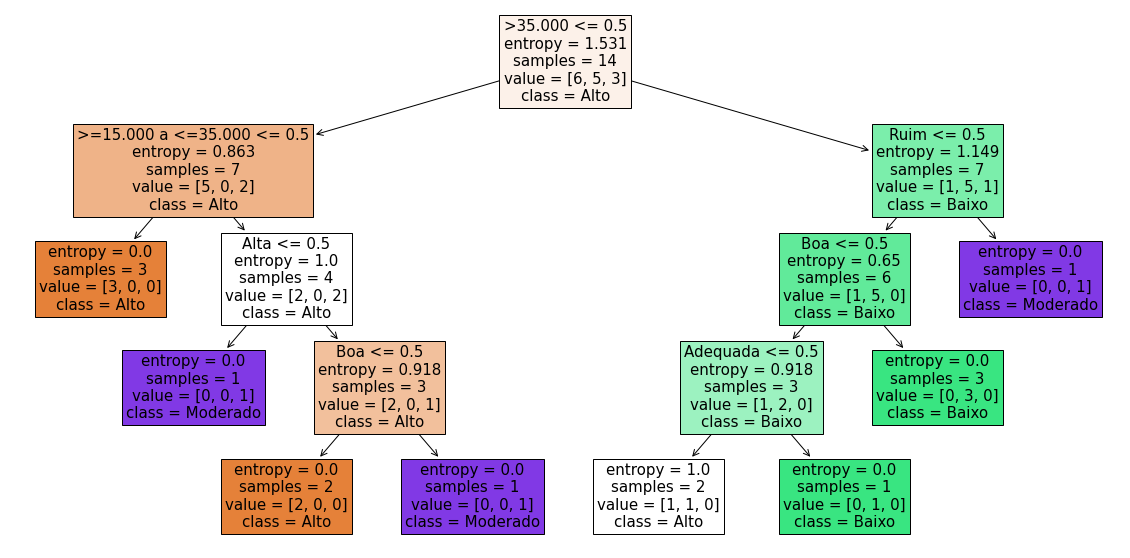

In [43]:
#Arvore completa
import matplotlib.pyplot as plt
from sklearn import tree
plt.subplots(figsize=(20,10))
tree.plot_tree(modelo,feature_names=x.columns,filled=True,fontsize=15,class_names=['Alto', 'Baixo','Moderado']);

**Árvore de decisão completa**

# Conclusão:

**O algoritmo de árvore de decisão é uma das formas mais rápidas de identificar as variáveis mais significativas para o modelo, temos alguns parâmetros que podemos usar para alcançar o objetivo. A Entropia é um dos critérios mais importante para a construção da árvore de decisão, pois com ele conseguimos construir a árvore de acordo com as variáveis mais importante para então conseguir classificar o modelo corretamente**

**A representação gráfica de uma árvore de decisão é muito intuitiva e torna o problema fácil de compreender, mesmo para pessoas que não tenham perfil analítico**